In [79]:
import networkx as nx
import xml.etree.ElementTree as ElementTree

In [93]:
root = ElementTree.parse('../resources/Verkehrsnetz.graphml').getroot()
nodes = root.findall('.//node')
edges = root.findall('.//edge')
print(nodes[0].attrib)

{'positionX': '206', 'positionY': '98', 'id': '0', 'mainText': 'Stadion', 'upText': '', 'size': '30'}


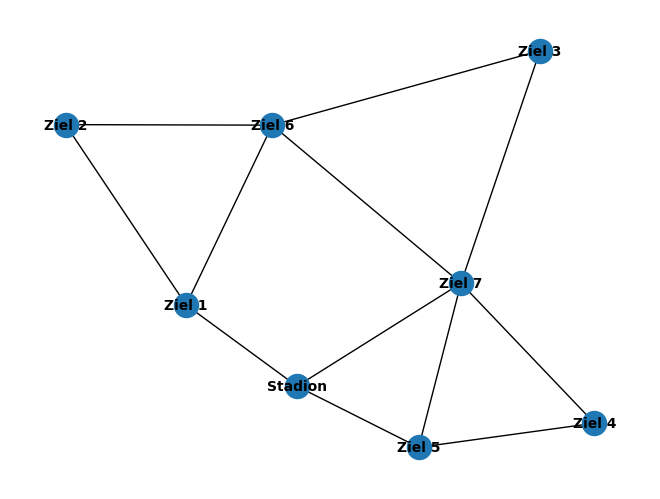

In [106]:
graph = nx.Graph()

for node in nodes:
    attr = node.attrib
    graph.add_node(attr["id"], label=attr["mainText"], size=attr["size"], pos=(attr["positionX"], attr["positionY"]))

for edge in edges:
    attr = edge.attrib
    graph.add_edge(attr["source"], attr["target"], weight=attr["weight"])

labelDict = {}
for key in graph.nodes.keys():
    labelDict[key] = graph.nodes[key]["label"]

nx.draw(graph, with_labels=True, labels=labelDict, font_size=10, font_weight='bold')